#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Loading the dataset

In [2]:
train_df = pd.read_csv('/content/Training_data.csv')
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [3]:
test_df  = pd.read_csv('/content/Testing_data.csv')
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


# Exploratory Data Analysis (EDA)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [6]:
train_df.shape

(5634, 21)

In [7]:
test_df.shape

(1409, 21)

###removing unwanted columns

In [8]:
train_df.drop(['customerID','gender'], axis=1, inplace=True)

In [9]:
test_df.drop(['customerID','gender'], axis=1, inplace=True)

In [10]:
train_df.shape

(5634, 19)

In [11]:
test_df.shape

(1409, 19)

###checking for duplicates

In [12]:
train_df.duplicated().sum()

np.int64(19)

In [13]:
test_df.duplicated().sum()

np.int64(3)

In [14]:
#removal of duplicates
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [15]:
train_df.duplicated().sum()

np.int64(0)

In [16]:
test_df.duplicated().sum()

np.int64(0)

###checking for null values

In [17]:
train_df.isnull().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169
OnlineBackup,0
DeviceProtection,0


In [18]:
test_df.isnull().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


###filling null values

In [19]:
# Filling online security with mode
train_df['OnlineSecurity'] = train_df['OnlineSecurity'].fillna(train_df['OnlineSecurity'].mode()[0])

In [20]:
#  Filling total charges with mode
train_df['TotalCharges'] = train_df['TotalCharges'].fillna(train_df['TotalCharges'].mode()[0])

In [21]:
# Filling monthly charges with median value
train_df['MonthlyCharges'] = train_df['MonthlyCharges'].fillna(train_df['MonthlyCharges'].median())

In [22]:
train_df.isnull().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


###outlier detection

Find outliers in tenure, monthly charges and total charges using box plot

<Axes: ylabel='tenure'>

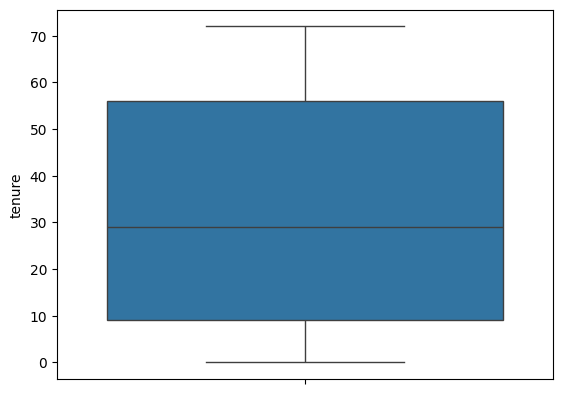

In [23]:
sns.boxplot(train_df['tenure'])#Here no outliers

<Axes: ylabel='MonthlyCharges'>

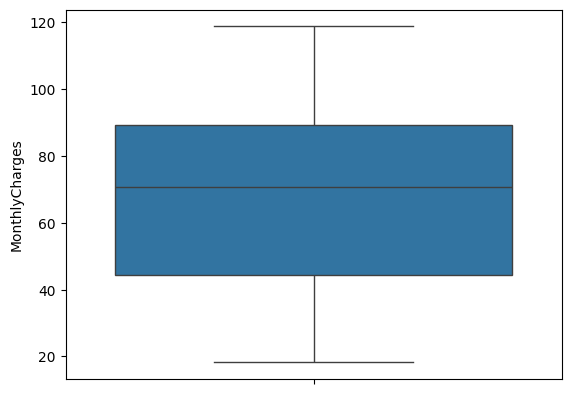

In [24]:
sns.boxplot(train_df['MonthlyCharges'])#Here no outliers

<Axes: ylabel='TotalCharges'>

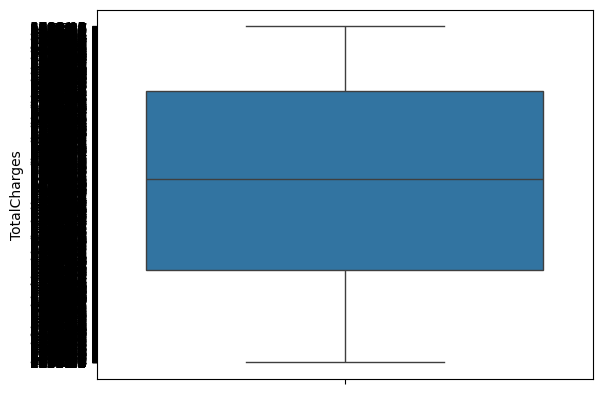

In [25]:
sns.boxplot(train_df['TotalCharges'])#Here no outliers

<Axes: ylabel='tenure'>

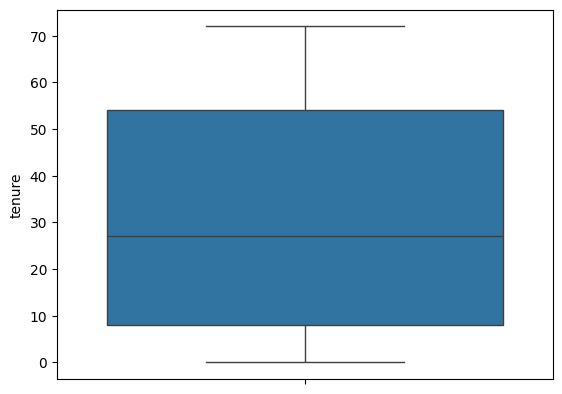

In [26]:
sns.boxplot(test_df['tenure'])#Here no outliers

<Axes: ylabel='MonthlyCharges'>

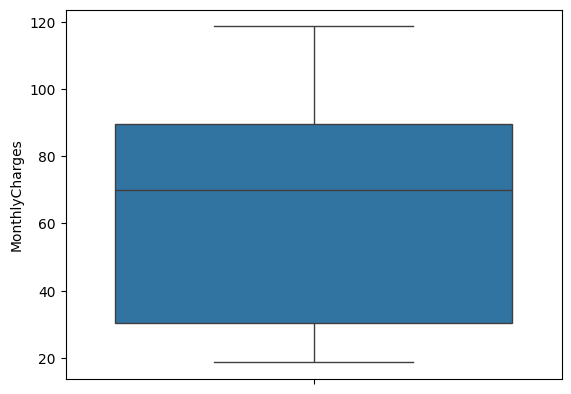

In [27]:
sns.boxplot(test_df['MonthlyCharges'])#Here no outliers

<Axes: ylabel='TotalCharges'>

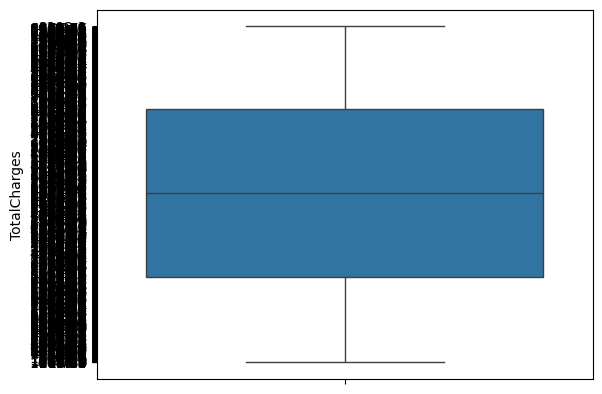

In [28]:
sns.boxplot(test_df['TotalCharges'])#Here no outliers

###Visualize correlations, distributions, and any interesting patterns.

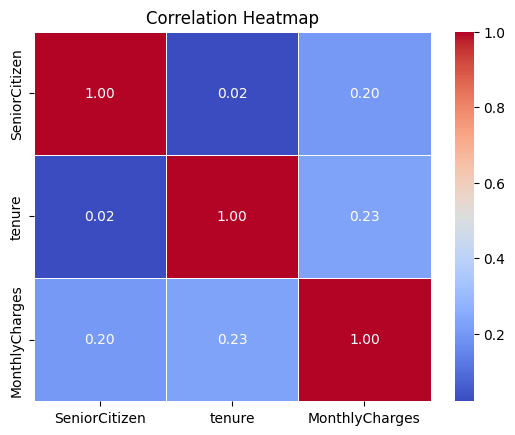

In [29]:
# Visualize correlations
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

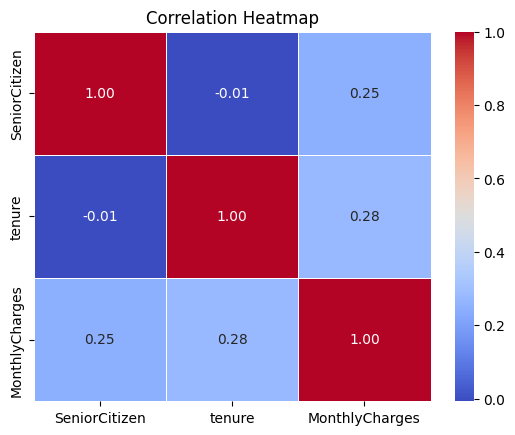

In [30]:
# Visualize correlations
corr = test_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

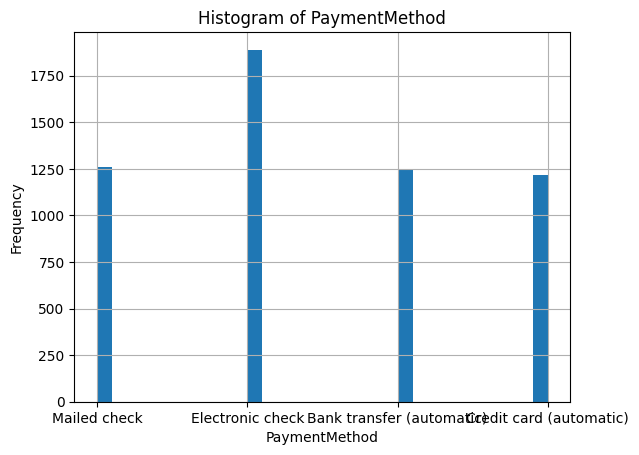

In [31]:
train_df['PaymentMethod'].hist(bins=30)
plt.title('Histogram of PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency')
plt.show()

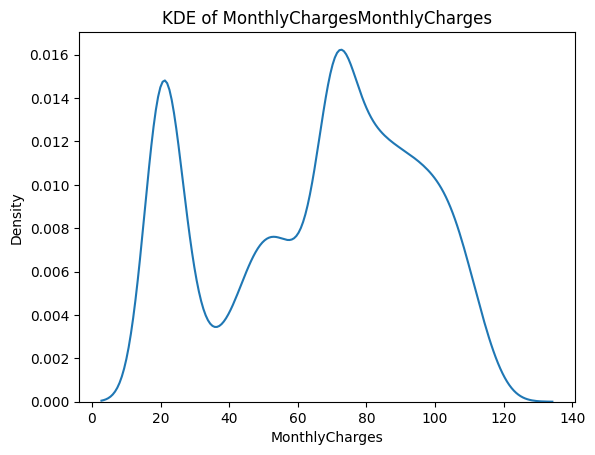

In [32]:
sns.kdeplot(train_df ['MonthlyCharges'].dropna())
plt.title('KDE of MonthlyChargesMonthlyCharges')
plt.show()

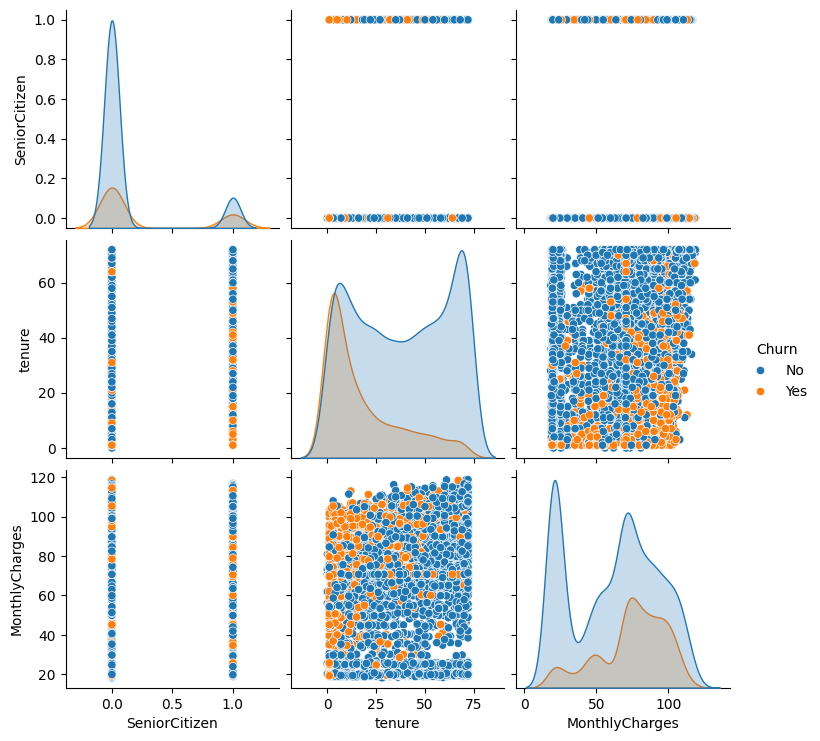

In [33]:
#used sns.pairplot() to plot relationships between all numeric features in the dataset
sns.pairplot(data = train_df, hue = 'Churn')

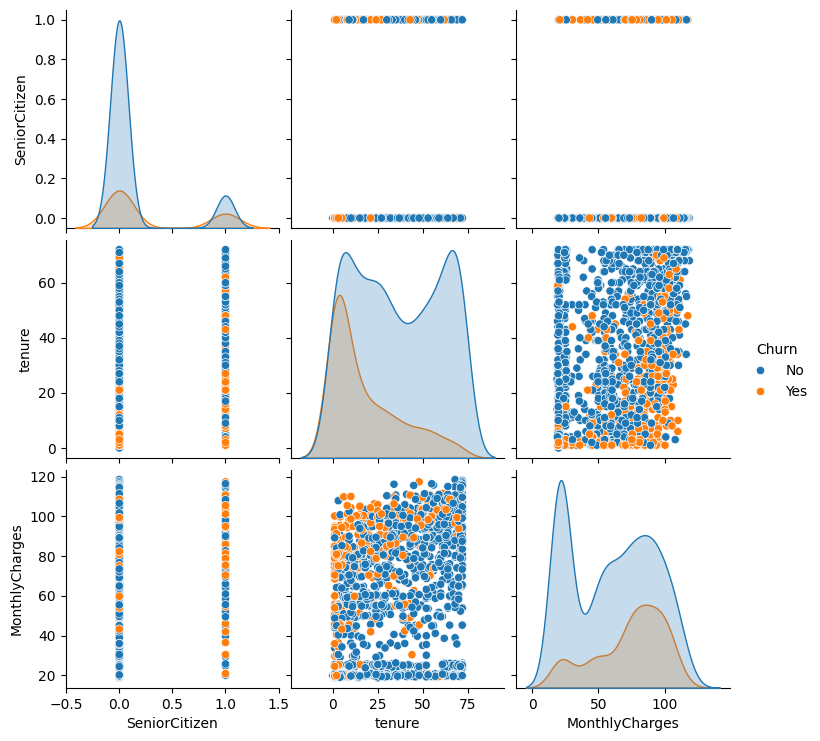

In [34]:
sns.pairplot(data = test_df, hue = 'Churn')

#Feature Engineering

###changing categorical columns to numerical

In [35]:
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5615 entries, 0 to 5633
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     5615 non-null   int64  
 1   Partner           5615 non-null   object 
 2   Dependents        5615 non-null   object 
 3   tenure            5615 non-null   int64  
 4   PhoneService      5615 non-null   object 
 5   MultipleLines     5615 non-null   object 
 6   InternetService   5615 non-null   object 
 7   OnlineSecurity    5615 non-null   object 
 8   OnlineBackup      5615 non-null   object 
 9   DeviceProtection  5615 non-null   object 
 10  TechSupport       5615 non-null   object 
 11  StreamingTV       5615 non-null   object 
 12  StreamingMovies   5615 non-null   object 
 13  Contract          5615 non-null   object 
 14  PaperlessBilling  5615 non-null   object 
 15  PaymentMethod     5615 non-null   object 
 16  MonthlyCharges    5615 non-null   float64
 17  

In [37]:
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')

In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1406 entries, 0 to 1408
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     1406 non-null   int64  
 1   Partner           1406 non-null   object 
 2   Dependents        1406 non-null   object 
 3   tenure            1406 non-null   int64  
 4   PhoneService      1406 non-null   object 
 5   MultipleLines     1406 non-null   object 
 6   InternetService   1406 non-null   object 
 7   OnlineSecurity    1406 non-null   object 
 8   OnlineBackup      1406 non-null   object 
 9   DeviceProtection  1406 non-null   object 
 10  TechSupport       1406 non-null   object 
 11  StreamingTV       1406 non-null   object 
 12  StreamingMovies   1406 non-null   object 
 13  Contract          1406 non-null   object 
 14  PaperlessBilling  1406 non-null   object 
 15  PaymentMethod     1406 non-null   object 
 16  MonthlyCharges    1406 non-null   float64
 17  

In [39]:
# Convert Contract type to numeric (if needed)
train_df['Contract'] = train_df['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

# Create interaction feature
train_df['Tenure_Contract'] = train_df['tenure'] * train_df['Contract']

In [40]:
train_df['CLV'] = train_df['tenure'] * train_df['MonthlyCharges']

In [41]:
# Convert Contract type to numeric (if needed)
test_df['Contract'] = test_df['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

# Create interaction feature
test_df['Tenure_Contract'] = test_df['tenure'] * test_df['Contract']

In [42]:
test_df['CLV'] = test_df['tenure'] * test_df['MonthlyCharges']

#Data Preprocessing

###Scaling

In [43]:
std_scale = StandardScaler()
train_df[['tenure', 'MonthlyCharges', 'TotalCharges']] = std_scale.fit_transform(train_df[['tenure', 'MonthlyCharges', 'TotalCharges']])
train_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Contract,CLV
0,0,No,No,0.092990,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,12,No,Mailed check,-1.548260,-0.702182,No,420,726.25
1,0,No,No,-0.191731,No,No phone service,DSL,No,No,Yes,...,No,No,1,Yes,Mailed check,-1.030585,-0.587050,No,28,1001.00
2,0,No,No,0.947151,Yes,Yes,Fiber optic,No,Yes,No,...,Yes,Yes,1,No,Electronic check,1.138469,1.451145,No,56,5521.60
3,0,Yes,No,0.255687,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,24,Yes,Bank transfer (automatic),-1.558613,-0.662672,No,936,797.55
4,0,Yes,Yes,0.418384,No,No phone service,DSL,No,Yes,No,...,Yes,No,12,Yes,Bank transfer (automatic),-0.495656,-0.061933,No,516,2203.75


In [44]:
std_scale = StandardScaler()
test_df[['tenure', 'MonthlyCharges', 'TotalCharges']] = std_scale.fit_transform(test_df[['tenure', 'MonthlyCharges', 'TotalCharges']])
test_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Contract,CLV
0,0,Yes,Yes,0.350076,Yes,Yes,Fiber optic,No,No,Yes,...,No,No,1,Yes,Electronic check,0.569885,0.478080,No,40,3248.0
1,0,Yes,No,-0.802247,Yes,Yes,DSL,Yes,No,Yes,...,Yes,Yes,12,No,Electronic check,0.492222,-0.598963,No,144,946.2
2,0,No,No,0.473539,Yes,Yes,Fiber optic,No,No,No,...,Yes,Yes,12,Yes,Electronic check,1.191190,0.887954,Yes,516,4300.0
3,0,No,No,1.667016,Yes,Yes,Fiber optic,Yes,Yes,Yes,...,Yes,Yes,24,Yes,Electronic check,1.792666,2.821107,No,1728,8510.4
4,0,No,No,-0.884556,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Electronic check,-0.915628,-0.823129,No,10,362.5


In [45]:
train_df.isna().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [46]:
columns_to_impute_mode = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV']
for col in columns_to_impute_mode:
    mode_vals = train_df[col].mode()
    if mode_vals.empty:
        train_df[col] = train_df[col].fillna('Unknown')
    else:
        train_df[col] = train_df[col].fillna(mode_vals[0])


train_df['TotalCharges']=train_df['TotalCharges'].fillna(train_df['TotalCharges'].median())

In [47]:
train_df.isna().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [48]:
test_df.isna().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [49]:
test_df['TotalCharges']=test_df['TotalCharges'].fillna(test_df['TotalCharges'].median())

In [50]:
test_df.isna().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


###Encoding

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5615 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     5615 non-null   int64  
 1   Partner           5615 non-null   object 
 2   Dependents        5615 non-null   object 
 3   tenure            5615 non-null   float64
 4   PhoneService      5615 non-null   object 
 5   MultipleLines     5615 non-null   object 
 6   InternetService   5615 non-null   object 
 7   OnlineSecurity    5615 non-null   object 
 8   OnlineBackup      5615 non-null   object 
 9   DeviceProtection  5615 non-null   object 
 10  TechSupport       5615 non-null   object 
 11  StreamingTV       5615 non-null   object 
 12  StreamingMovies   5615 non-null   object 
 13  Contract          5615 non-null   int64  
 14  PaperlessBilling  5615 non-null   object 
 15  PaymentMethod     5615 non-null   object 
 16  MonthlyCharges    5615 non-null   float64
 17  

In [52]:
label_enc=LabelEncoder()
train_df['Partner']=label_enc.fit_transform(train_df['Partner'])

In [53]:
train_df['Dependents']=label_enc.fit_transform(train_df['Dependents'])

In [54]:
train_df['MultipleLines']=label_enc.fit_transform(train_df['MultipleLines'])

In [55]:
train_df['OnlineSecurity']=label_enc.fit_transform(train_df['OnlineSecurity'])

In [56]:
train_df['OnlineBackup']=label_enc.fit_transform(train_df['OnlineBackup'])

In [57]:
train_df['DeviceProtection']=label_enc.fit_transform(train_df['DeviceProtection'])

In [58]:
train_df['TechSupport']=label_enc.fit_transform(train_df['TechSupport'])

In [59]:
train_df['StreamingTV']=label_enc.fit_transform(train_df['StreamingTV'])

In [60]:
train_df['StreamingMovies']=label_enc.fit_transform(train_df['StreamingMovies'])

In [61]:
train_df['PhoneService']=label_enc.fit_transform(train_df['PhoneService'])

In [62]:
train_df['PaperlessBilling']=label_enc.fit_transform(train_df['PaperlessBilling'])

In [63]:
train_df['Churn']=label_enc.fit_transform(train_df['Churn'])

In [64]:
train_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Contract,CLV
0,0,0,0,0.092990,1,0,No,1,1,1,...,1,1,12,0,Mailed check,-1.548260,-0.702182,0,420,726.25
1,0,0,0,-0.191731,0,1,DSL,0,0,2,...,0,0,1,1,Mailed check,-1.030585,-0.587050,0,28,1001.00
2,0,0,0,0.947151,1,2,Fiber optic,0,2,0,...,2,2,1,0,Electronic check,1.138469,1.451145,0,56,5521.60
3,0,1,0,0.255687,1,0,No,1,1,1,...,1,1,24,1,Bank transfer (automatic),-1.558613,-0.662672,0,936,797.55
4,0,1,1,0.418384,0,1,DSL,0,2,0,...,2,0,12,1,Bank transfer (automatic),-0.495656,-0.061933,0,516,2203.75


In [65]:
train_df= pd.get_dummies(train_df, columns = ['InternetService','Contract','PaymentMethod'],dtype=int,prefix=['Internetservice','Contract','Paymentmethod'])
train_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Internetservice_DSL,Internetservice_Fiber optic,Internetservice_No,Contract_1,Contract_12,Contract_24,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check
0,0,0,0,0.092990,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,0,1
1,0,0,0,-0.191731,0,1,0,0,2,2,...,1,0,0,1,0,0,0,0,0,1
2,0,0,0,0.947151,1,2,0,2,0,0,...,0,1,0,1,0,0,0,0,1,0
3,0,1,0,0.255687,1,0,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0
4,0,1,1,0.418384,0,1,0,2,0,2,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,0,0,0.743779,1,0,0,2,2,0,...,0,1,0,1,0,0,0,0,1,0
5630,1,1,0,1.435243,0,1,2,2,2,0,...,1,0,0,0,0,1,0,0,1,0
5631,0,1,1,1.597941,1,0,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0
5632,0,0,0,1.475918,1,0,0,0,2,2,...,1,0,0,0,0,1,0,1,0,0


In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5615 entries, 0 to 5633
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5615 non-null   int64  
 1   Partner                                  5615 non-null   int64  
 2   Dependents                               5615 non-null   int64  
 3   tenure                                   5615 non-null   float64
 4   PhoneService                             5615 non-null   int64  
 5   MultipleLines                            5615 non-null   int64  
 6   OnlineSecurity                           5615 non-null   int64  
 7   OnlineBackup                             5615 non-null   int64  
 8   DeviceProtection                         5615 non-null   int64  
 9   TechSupport                              5615 non-null   int64  
 10  StreamingTV                              5615 non-nul

In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1406 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     1406 non-null   int64  
 1   Partner           1406 non-null   object 
 2   Dependents        1406 non-null   object 
 3   tenure            1406 non-null   float64
 4   PhoneService      1406 non-null   object 
 5   MultipleLines     1406 non-null   object 
 6   InternetService   1406 non-null   object 
 7   OnlineSecurity    1406 non-null   object 
 8   OnlineBackup      1406 non-null   object 
 9   DeviceProtection  1406 non-null   object 
 10  TechSupport       1406 non-null   object 
 11  StreamingTV       1406 non-null   object 
 12  StreamingMovies   1406 non-null   object 
 13  Contract          1406 non-null   int64  
 14  PaperlessBilling  1406 non-null   object 
 15  PaymentMethod     1406 non-null   object 
 16  MonthlyCharges    1406 non-null   float64
 17  

In [68]:
label_enc=LabelEncoder()
test_df['Partner']=label_enc.fit_transform(test_df['Partner'])

In [69]:
test_df['Dependents']=label_enc.fit_transform(test_df['Dependents'])

In [70]:
test_df['MultipleLines']=label_enc.fit_transform(test_df['MultipleLines'])

In [71]:
test_df['OnlineSecurity']=label_enc.fit_transform(test_df['OnlineSecurity'])

In [72]:
test_df['OnlineBackup']=label_enc.fit_transform(test_df['OnlineBackup'])

In [73]:
test_df['DeviceProtection']=label_enc.fit_transform(test_df['DeviceProtection'])

In [74]:
test_df['TechSupport']=label_enc.fit_transform(test_df['TechSupport'])

In [75]:
test_df['StreamingTV']=label_enc.fit_transform(test_df['StreamingTV'])

In [76]:
test_df['StreamingMovies']=label_enc.fit_transform(test_df['StreamingMovies'])

In [77]:
test_df['PhoneService']=label_enc.fit_transform(test_df['PhoneService'])

In [78]:
test_df['PaperlessBilling']=label_enc.fit_transform(test_df['PaperlessBilling'])

In [79]:
test_df['Churn']=label_enc.fit_transform(test_df['Churn'])

In [80]:
test_df= pd.get_dummies(test_df, columns = ['InternetService','Contract','PaymentMethod'],dtype=int,prefix=['Internetservice','Contract','Paymentmethod'])
test_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Internetservice_DSL,Internetservice_Fiber optic,Internetservice_No,Contract_1,Contract_12,Contract_24,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check
0,0,1,1,0.350076,1,2,0,0,2,0,...,0,1,0,1,0,0,0,0,1,0
1,0,1,0,-0.802247,1,2,2,0,2,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0.473539,1,2,0,0,0,2,...,0,1,0,0,1,0,0,0,1,0
3,0,0,0,1.667016,1,2,2,2,2,2,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,-0.884556,0,1,0,2,0,2,...,1,0,0,1,0,0,0,0,1,0


In [81]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1406 entries, 0 to 1408
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            1406 non-null   int64  
 1   Partner                                  1406 non-null   int64  
 2   Dependents                               1406 non-null   int64  
 3   tenure                                   1406 non-null   float64
 4   PhoneService                             1406 non-null   int64  
 5   MultipleLines                            1406 non-null   int64  
 6   OnlineSecurity                           1406 non-null   int64  
 7   OnlineBackup                             1406 non-null   int64  
 8   DeviceProtection                         1406 non-null   int64  
 9   TechSupport                              1406 non-null   int64  
 10  StreamingTV                              1406 non-nul

In [82]:
train_df.isna().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [83]:
test_df.isna().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


#Model Building

###Test-Train split

In [84]:
X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']

X_test = test_df.drop('Churn', axis=1)
y_test = test_df['Churn']

In [85]:
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier()
svm_model = SVC(probability=True)

In [86]:
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(probability=True)

###Model evaluation

In [87]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n📌 Evaluation for {name}")
    print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score  : {f1_score(y_test, y_pred):.4f}")


# Evaluate each
evaluate_model(log_model, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")
evaluate_model(svm_model, "Support Vector Machine")


📌 Evaluation for Logistic Regression
Accuracy  : 0.8158
Precision : 0.6817
Recall    : 0.5412
F1 Score  : 0.6034

📌 Evaluation for Random Forest
Accuracy  : 0.7888
Precision : 0.6136
Recall    : 0.4973
F1 Score  : 0.5493

📌 Evaluation for Support Vector Machine
Accuracy  : 0.7411
Precision : 0.0000
Recall    : 0.0000
F1 Score  : 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Model Tuning

###Fine tuning with Randomized search cv

In [88]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

###Model implementation with RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,             # number of random combinations to try
    cv=5,                  # 5-fold cross-validation
    scoring='f1',          # or 'roc_auc' depending on your goal
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
print(" Best Parameters:")
print(random_search.best_params_)

best_rf = random_search.best_estimator_

In [ ]:
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("Evaluation Metrics (After Tuning):")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))